## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
!pip install tensorflow

array([[<AxesSubplot:title={'center':'EIN'}>,
        <AxesSubplot:title={'center':'STATUS'}>],
       [<AxesSubplot:title={'center':'ASK_AMT'}>,
        <AxesSubplot:title={'center':'IS_SUCCESSFUL'}>]], dtype=object)

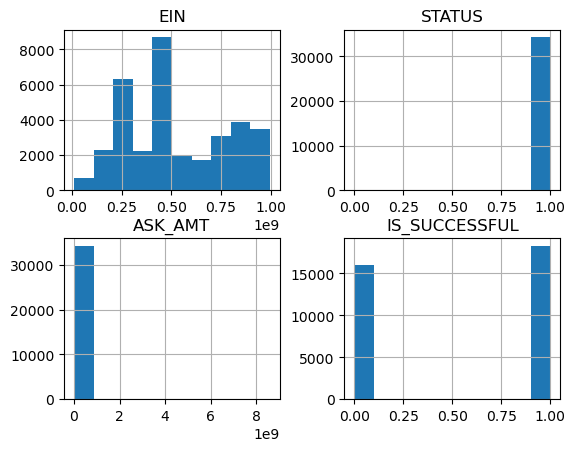

In [5]:
application_df.hist()

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [6]:
# Determine the number of unique values in each column.
application_df.nunique() 

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = app_counts[app_counts < 500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts[class_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_counts[class_counts < 1000].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
ask_counts = application_df['ASK_AMT'].value_counts()
ask_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [14]:
# Choose a cutoff value and create a list of ask amounts to be replaced
# use the variable name `ask_to_replace`
ask_to_replace = ask_counts[ask_counts < 25000].index

# Replace in dataframe
for cls in ask_to_replace:
    application_df['ASK_AMT'] = application_df['ASK_AMT'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['ASK_AMT'].value_counts()

5000     25398
Other     8901
Name: ASK_AMT, dtype: int64

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df)
dummies_df

,EIN,STATUS,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,10520599,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,10531628,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,10547893,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,10553066,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,10556103,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34295,996010315,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34296,996012607,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34297,996015768,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [17]:
# Split our preprocessed data into our features and target arrays
y = dummies_df.IS_SUCCESSFUL.values
X = dummies_df.drop(columns = 'IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [20]:
# Define the model
nn_2 = tf.keras.models.Sequential()

input_dims = len(X_train[0])

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units = 80, activation = 'tanh', input_dim = input_dims))

# Add dropout layer
tf.keras.layers.Dropout(0.5)

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units = 30, activation = 'tanh'))

# Add dropout layer
tf.keras.layers.Dropout(0.5)

# Output layer
nn_2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1569120   
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,571,581
Trainable params: 1,571,581
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Import Early Stopping Library
from keras.callbacks import EarlyStopping

In [23]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [24]:
!pip install keras-tuner

In [25]:
# Train the model
nn_2.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/100
2573/2573 [==============================] - 42s 16ms/step - loss: 0.4833 - accuracy: 0.7665 - val_loss: 0.4705 - val_accuracy: 0.7893
Epoch 2/100
2573/2573 [==============================] - 41s 16ms/step - loss: 0.1290 - accuracy: 0.9559 - val_loss: 0.6788 - val_accuracy: 0.7881
Epoch 3/100
2573/2573 [==============================] - 41s 16ms/step - loss: 0.1015 - accuracy: 0.9614 - val_loss: 0.4729 - val_accuracy: 0.7789
Epoch 4/100
2573/2573 [==============================] - 42s 16ms/step - loss: 0.0952 - accuracy: 0.9624 - val_loss: 0.4535 - val_accuracy: 0.7946
Epoch 5/100
2573/2573 [==============================] - 42s 16ms/step - loss: 0.0924 - accuracy: 0.9628 - val_loss: 0.4682 - val_accuracy: 0.7630
Epoch 6/100
2573/2573 [==============================] - 42s 16ms/step - loss: 0.0907 - accuracy: 0.9633 - val_loss: 0.4777 - val_accuracy: 0.7739
Epoch 7/100
2573/2573 [==============================] - 41s 16ms/step - loss: 0.0896 - accuracy: 0.9628 - val_loss: 0

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4535 - accuracy: 0.7946 - 1s/epoch - 5ms/step
Loss: 0.4534601867198944, Accuracy: 0.7946355938911438


In [29]:
# Export our model to HDF5 file
nn_2.save('HDF5 files/AlphabetSoupCharity_Optimization_2.h5')